**(1/06/2022)**

<h1><center><u> Assignment 2 </u></h1></center>


# Sanket M. Bairagi  

**Roll No. - 33**   
**M.Sc. Data Science And Big Data Analytics.**  
**B.K.Birla College Kalyan.**


------------------

<h2><center><u>Task 1 - Logistic Regression On Iris Dataset </u></center></h2>

**Introduction** -  
we are going to perform the **Logistic Regression Model on the Iris Dataset** to predict the species of the flower as either **virginica**, **setosa**, or **versicolor** on the based off of the pedal length, pedal height, sepal length, and sepal height of the iris flower.



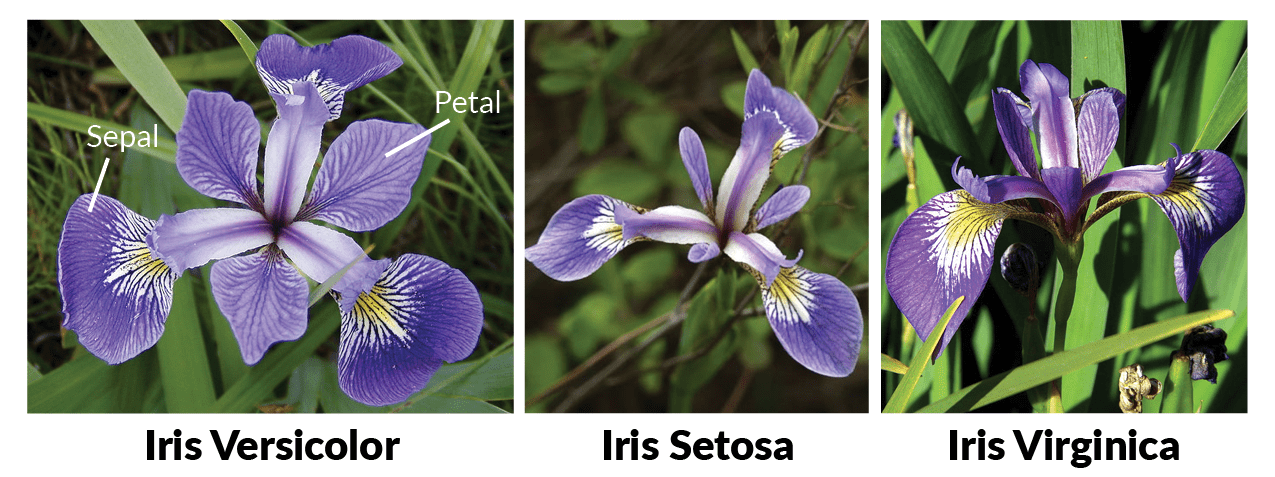

**Attribute Information:**  

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:Setosa,Versicolour,Virginica

------------------

Importing essential libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### EDA On Iris Dataset.

In [2]:
# loading Iris Dataset 

iris =sns.load_dataset("iris")

In [3]:
# Top 5 rows of iris dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# shape of iris Dataset
iris.shape

(150, 5)

Iris dataset has 150 rows and 5 columns.

In [5]:
# Information Of iris datset-
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLength, SepalWidth, PetalLength, and PetalWidth have **float** data types. 'Species' has an **object** data type. 

In [6]:
# check for  Null Values

iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In the Dataset there is no Null value is present.

In [7]:
# no of Samples of each Species

iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Each species has 50 samples.

In [8]:
# Statistical description of dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**sepal_length** -  
Average Length   - 5.843333 cm  
Minimum Length   - 4.300000 cm  
Maximum Length   - 7.900000 cm  

**sepal_width** -  
Average Length   - 3.057333 cm  
Minimum Length   - 2.000000 cm  
Maximum Length   - 4.400000 cm 


**petal_length** -  
Average Length   - 3.758000 cm  
Minimum Length   - 1.000000 cm  
Maximum Length   - 6.900000 cm 

**petal_width** -  
Average Length   - 1.199333 cm  
Minimum Length   - 0.100000 cm  
Maximum Length   - 2.500000 cm 

### Analysing Data Visually

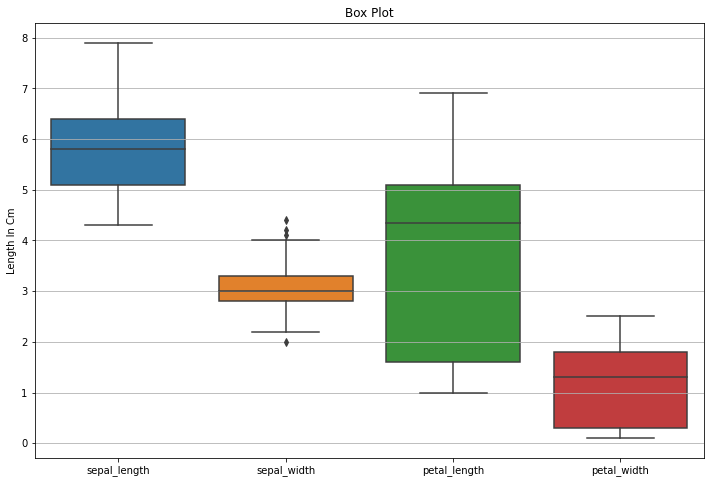

In [9]:
# box plot for each attribute.
plt.figure(figsize=(12,8))
plt.grid(True)
plt.title("Box Plot")
plt.ylabel("Length In Cm")
sns.boxplot(data=iris)
plt.show()


In above boxplot we can easily understand the median,maximum and minimum length of each attribute.

* petal length has highest length and highly distributed.
* sepal width has very low distributed with some outliers.


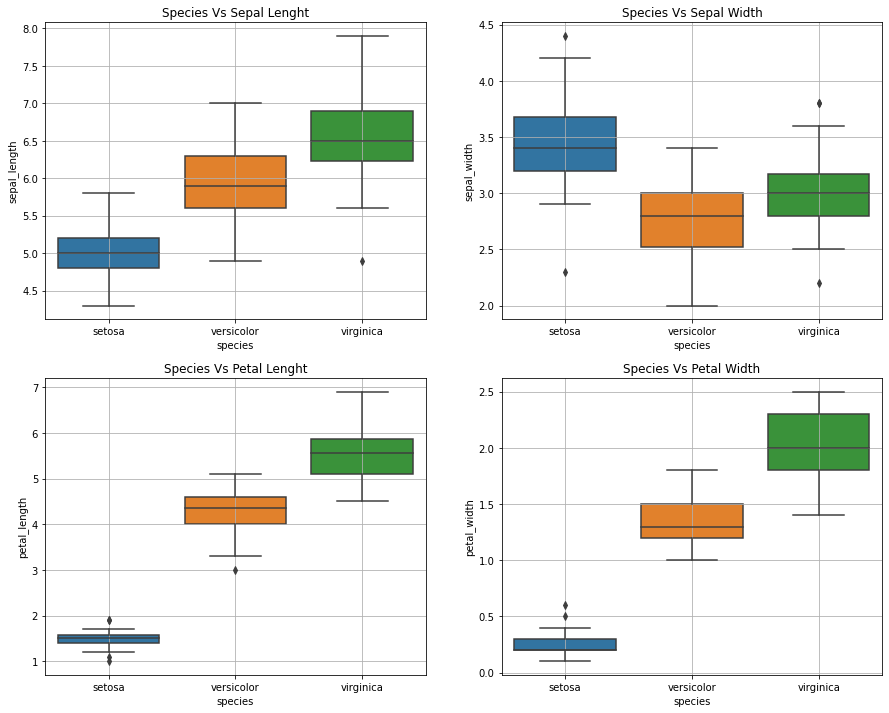

In [10]:
# box plot for sepal and petal lehnth and width with respect each species 
plt.figure(figsize=(15,12))


plt.subplot(2,2,1)
plt.title("Species Vs Sepal Lenght")
sns.boxplot(data=iris,x="species",y="sepal_length")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Species Vs Sepal Width")
sns.boxplot(data=iris,x="species",y="sepal_width")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Species Vs Petal Lenght")
sns.boxplot(data=iris,x="species",y="petal_length")
plt.grid(True)

plt.subplot(2,2,4)
plt.title("Species Vs Petal Width")
sns.boxplot(data=iris,x="species",y="petal_width")
plt.grid(True)
plt.show()

In above boxplot we can easily understand the median,maximum and minimum legth and width with respect to sepal and patel of each species.
* Species versicolor has the average features.
* Species Virginica has the highest features.
* species Setosa has the small features and less distributed with some outliers.


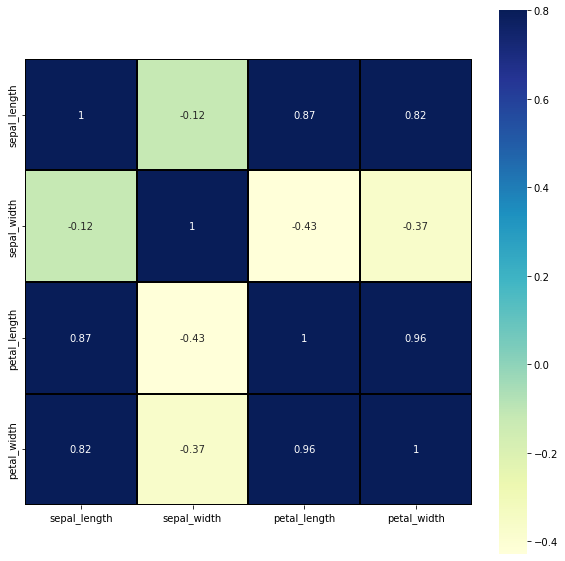

In [11]:
# heatmap for corrlation
plt.figure(figsize=(10,10))
sns.heatmap(iris.corr(),annot=True,square=True,linecolor='black', cmap='YlGnBu',vmax=.8, linewidth=.01)
plt.show()

In above heatmap,
* Petal width and petal length have very high correlation.
* Petal length and sepal width have good correlations.
* Petal Width and Sepal length have good correlations 

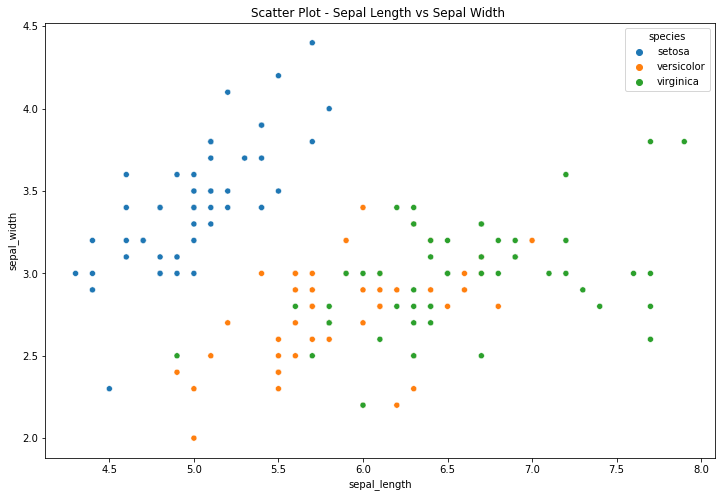

In [12]:
# scatter plot
plt.figure(figsize=(12,8))
plt.title("Scatter Plot - Sepal Length vs Sepal Width ")
sns.scatterplot(x="sepal_length",y="sepal_width",data=iris,hue="species")
plt.show()

* In above scatter plot sepal width increase as sepal lenth increases.   
* Species Setosa has smaller sepal lengths but larger sepal widths.  
* Versicolor Species lies in the middle of the other two species in terms of sepal length and width.  
* Species Virginica has larger sepal lengths but smaller sepal widths.  

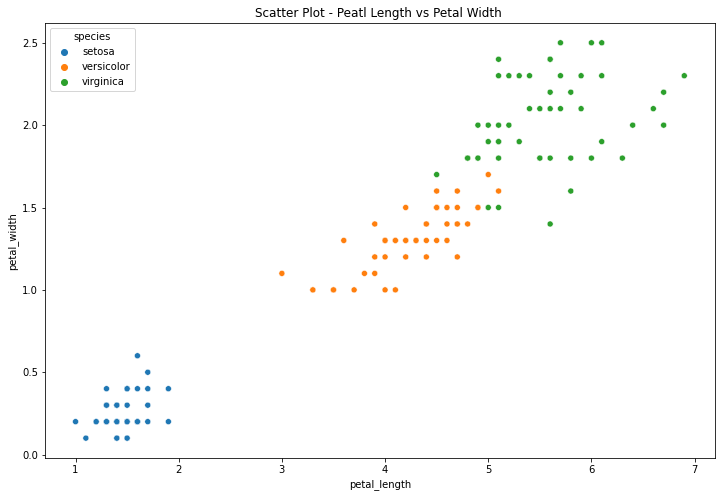

In [13]:
plt.figure(figsize=(12,8))
plt.title("Scatter Plot - Peatl Length vs Petal Width ")
sns.scatterplot(x="petal_length",y="petal_width",data=iris,hue="species")
plt.show()

* In above scatter plot peatl width increase as petal lenth increases. 
* Species Setosa has smaller petal lengths and widths.
* Versicolor Species lies in the middle of the other two species in terms of petal length and width
* Species Virginica has the largest of petal lengths and widths.

<IPython.core.display.Javascript object>


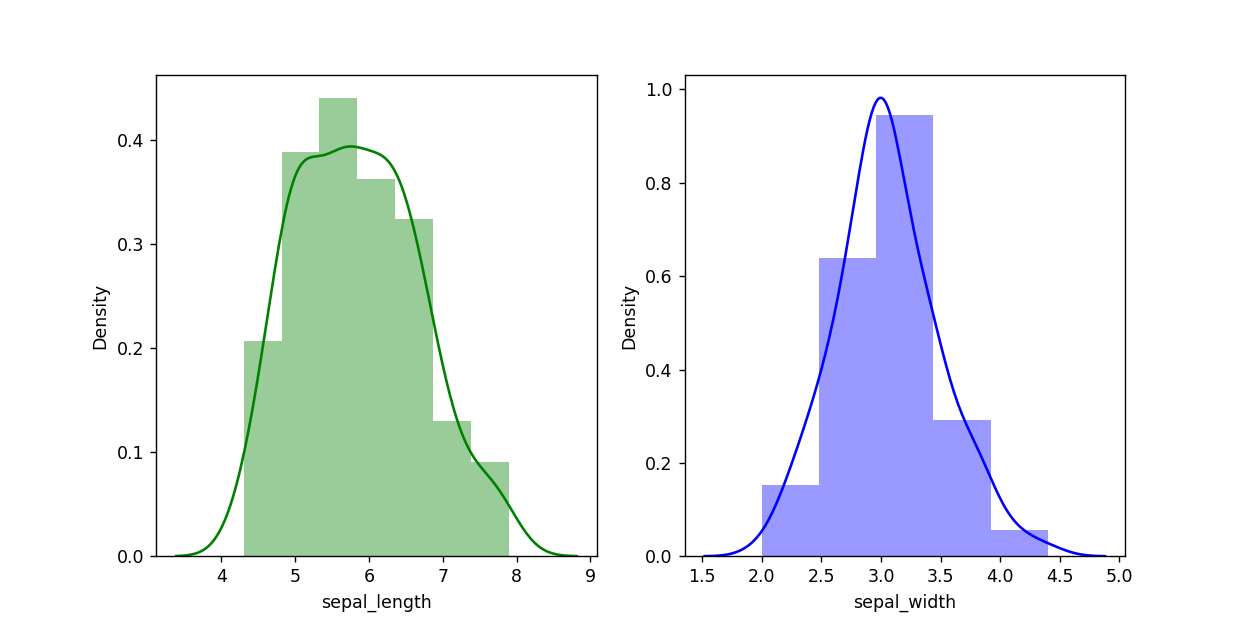

In [99]:
# histogram

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(iris["sepal_length"],bins=7,color="green")

plt.subplot(1,2,2)
sns.distplot(iris["sepal_width"],bins=5,color="blue")

plt.show()

in above histogram :-
* The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6 
* The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5

<IPython.core.display.Javascript object>


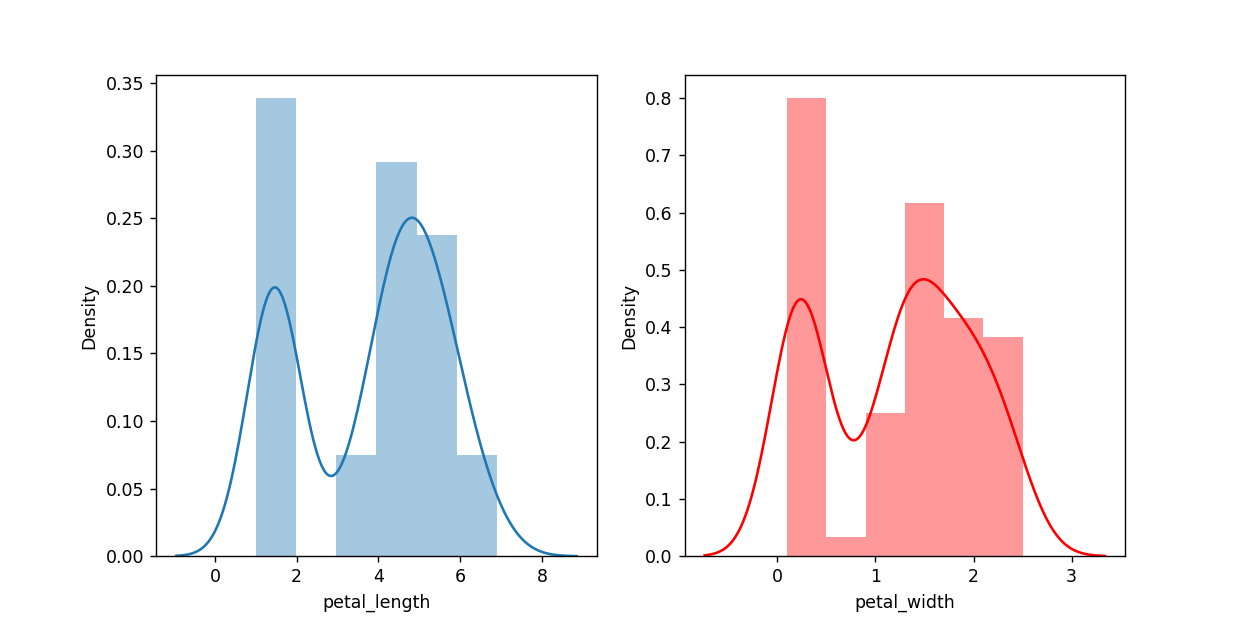

In [102]:
# histogram

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(iris["petal_length"],bins=6)

plt.subplot(1,2,2)
sns.distplot(iris["petal_width"],bins=6,color="red")

plt.show()

* The highest frequency of the petal length is around 50 which is between 1 and 2
* The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

### Data Prepartion.

In [14]:
# splitting thge data in X and y for train test split 

X=iris.drop("species",axis=1)
y=iris.species

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Iris data is divided into two parts in the X and y variable.

#### Train Test Split

* Training dataset - used to train our model
* Testing dataset - used to test if our model is making accurate predictions

In [17]:
# importing libraries.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=100)

In [18]:
# shape of train test data
print("X_train shape - ",X_train.shape)
print("X_test shape  - ",X_test.shape)
print("y_train shape - ",y_train.shape)
print("y_test shape  - ",y_test.shape)

X_train shape -  (120, 4)
X_test shape  -  (30, 4)
y_train shape -  (120,)
y_test shape  -  (30,)


In [19]:
# data need to be scalled

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train[["sepal_length","sepal_width","petal_length","petal_width"]]=sc.fit_transform(X_train[["sepal_length","sepal_width","petal_length","petal_width"]])
X_test[["sepal_length","sepal_width","petal_length","petal_width"]]=sc.transform(X_test[["sepal_length","sepal_width","petal_length","petal_width"]])



In [20]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
81,-0.361515,-1.497786,-0.016510,-0.252421
99,-0.111476,-0.576072,0.216575,0.151453
119,0.263583,-1.958643,0.741017,0.420702
12,-1.236652,-0.115214,-1.356751,-1.464044
16,-0.486535,1.958643,-1.415023,-1.060169


In [21]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
128,0.763661,-0.576072,1.090645,1.228450
11,-1.236652,0.806500,-1.240209,-1.329419
118,2.388916,-1.036929,1.848173,1.497700
15,-0.111476,3.110786,-1.298480,-1.060169
123,0.638642,-0.806500,0.682746,0.824576


Scalling is done over train and test dataset,now we will fit the logistic regression model.

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,multi_class="ovr")

In [23]:
lr

LogisticRegression(multi_class='ovr', random_state=0)

In [24]:
# fiting the traing data in the lr 

lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [25]:
# predict y over X_test data

y_pred=lr.predict(X_test)

In [26]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred}).head()

,Actual,Predicted
128,virginica,virginica
11,setosa,setosa
118,virginica,virginica
15,setosa,setosa
123,virginica,virginica


In [27]:
# checking the score of model

from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(y_test,y_pred)

0.9666666666666667

In [28]:
# confusion matrics

confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

In [29]:
#checking the model over unseen data

new = [[.5,.5,.5,.5]]
lr.predict(new)

array(['versicolor'], dtype=object)

model predicted new data correctly.

In [103]:
# probability of prediction of new data.
lr.predict_proba(new)

array([[0.04175057, 0.4841206 , 0.47412882]])

### Conclusion :-  We get 96.66 % Accuracy Score Over Multiclass Logistic Regression on Iris Dataset.

----


<h2><center><u>Task 2 - Logistic Regression On Age_salary_purchesed Dataset </u></center></h2>

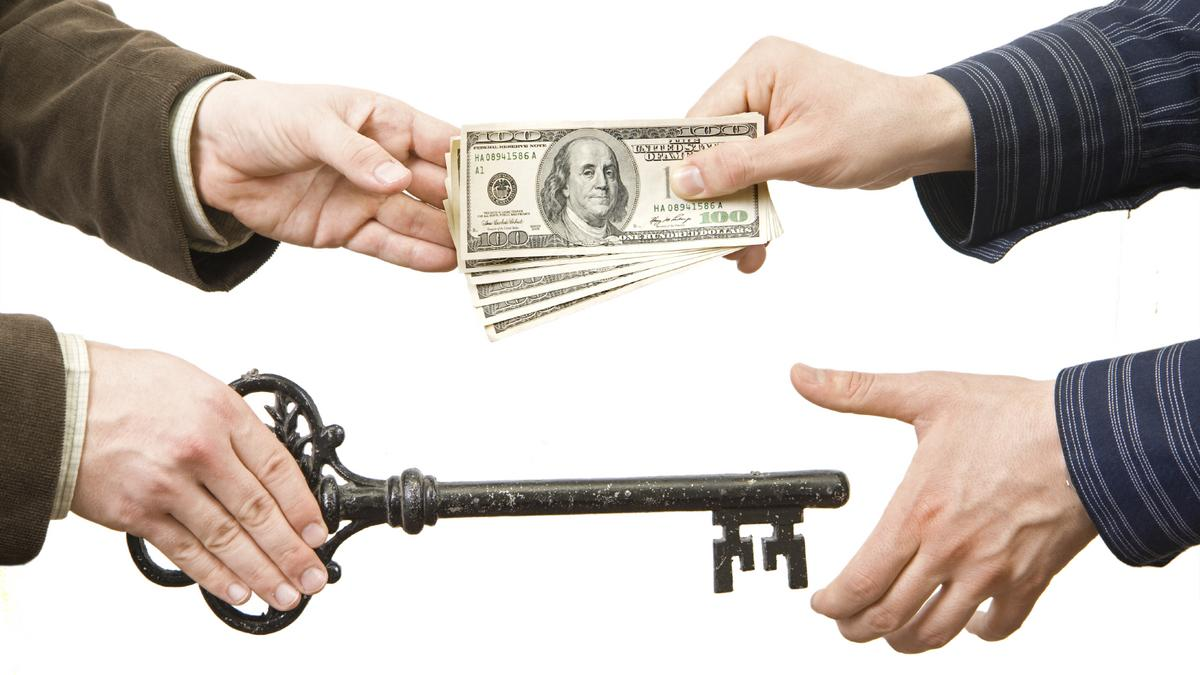


**Introduction** - We are going to use a simple dataset to implement Logistic regression. This dataset contains Age, Salary and Purchased columns. Purchased column has data as 0 and 1 where 1 denotes that product is purchased and 0 denotes product is not purchesed.

In [31]:
# importing Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [32]:
# Loading dataset 
data=pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BK_Birla/main/LogisticRegressionTakeHomeAssignment.csv")
data.head(10)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


### EDA

In [33]:
# shape of dataset
data.shape

(400, 3)

Datset has 400 rows and 3 columns.

In [34]:
# check for null / missinng values.

data.isna().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

datset has no null value.

In [35]:
# Information of datest

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


all columns contains numerical values.

In [36]:
# statistical Description

data.describe()

,Age,Salary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**age** -   
Average - 37.65  
Minimum - 18.00  
Maximum - 60.00  
  
**salary** -   
Average - 69742.50  
Minimum - 15000.00  
Maximum - 150000.00  
  
**purchesed** -   
Minimum - 0  
Maximum - 1  

In [37]:
# no of purchesed 

data["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

in the dataset 257 entries for not purchesed and 143 entries for purcheses.

### Analysing Data Visually

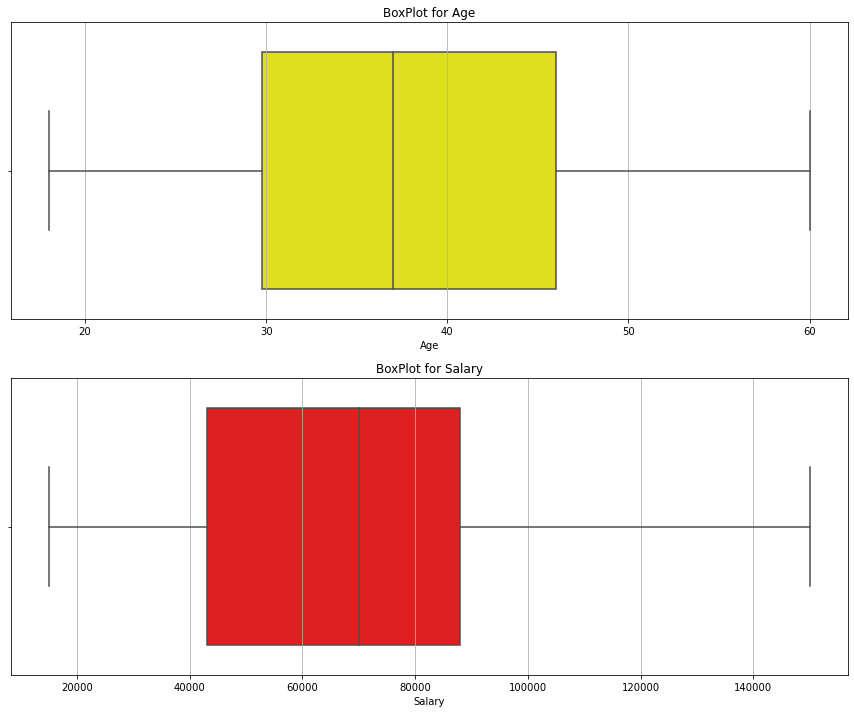

In [38]:

plt.figure(figsize=(15,12))


plt.subplot(2,1,1)
plt.grid(True)
plt.title("BoxPlot for Age")
sns.boxplot(data=data, x="Age",color="Yellow")

plt.subplot(2,1,2)
plt.grid(True)
plt.title("BoxPlot for Salary")
sns.boxplot(data=data, x="Salary",color="red")

plt.show()



in above box plot we can see median , min and max of age and salary columns
* No outliers in the salary as well as age column.

In [39]:
# median of age and salary
print("Median of Age - ",np.median(data.Age))
print("Median of Age - ",np.median(data.Salary))

Median of Age -  37.0
Median of Age -  70000.0


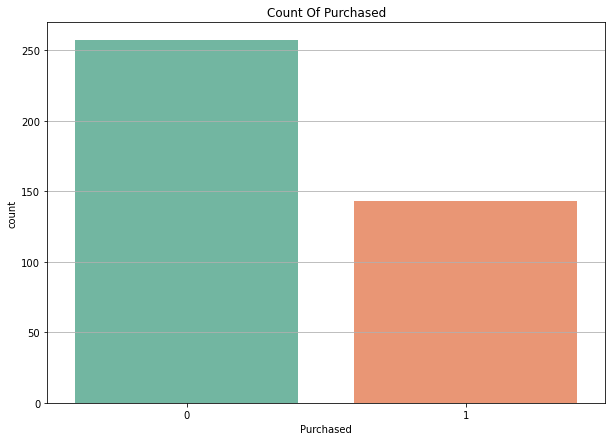

In [40]:
# count plot for purchesed 
plt.figure(figsize=(10,7))
plt.title("Count Of Purchased")
plt.grid(True)
sns.countplot(x="Purchased",data=data,palette="Set2")
plt.show()

Not purchased category has high count then purechased category.

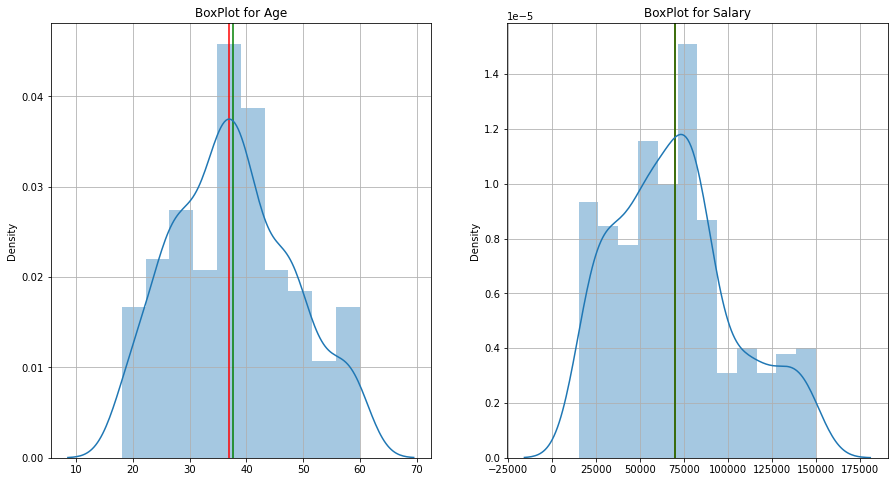

In [41]:
plt.figure(figsize=(15,8))


plt.subplot(1,2,1)
plt.grid(True)
plt.title("BoxPlot for Age")
plt.axvline(np.median(data.Age),color="r")
plt.axvline(np.mean(data.Age),color="g")
sns.distplot(x=data["Age"])

plt.subplot(1,2,2)
plt.grid(True)
plt.title("BoxPlot for Salary")
plt.axvline(np.median(data.Salary),color="r")
plt.axvline(np.mean(data.Salary),color="g")
sns.distplot(x=data["Salary"])


plt.show()

most of people belongs to age 35-45 years.
maximum salary of peoples between $ 72000 - 79000.
age disribution graph well normally distributed. in other hand salary distribution graph approximatly normally distributed.


### Data Prepartion

In [42]:
data.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [43]:
# separating data into indipendent and dependent in X and y varaibles.

X_data = data.drop(["Purchased"],axis=1)
y_data = data.Purchased


In [44]:
X_data.head()     # indipendent columns

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [45]:
y_data.head()     # dependent column

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [46]:
# Train test spliting

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_data,y_data,test_size=0.25,random_state=100)

In [47]:
# shape of train test splited data

print("Xtrain shape - ",Xtrain.shape)
print("Xtest shape  - ",Xtest.shape)
print("ytrain shape - ",ytrain.shape)
print("ytest shape  - ",ytest.shape)


Xtrain shape -  (300, 2)
Xtest shape  -  (100, 2)
ytrain shape -  (300,)
ytest shape  -  (100,)


In [48]:
# data need scalling

from sklearn.preprocessing import StandardScaler
mnsc= StandardScaler()

Xtrain[["Age","Salary"]]=mnsc.fit_transform(Xtrain[["Age","Salary"]])
Xtest[["Age","Salary"]]=mnsc.transform(Xtest[["Age","Salary"]])

In [49]:
Xtrain.head()

,Age,Salary
163,-0.250017,-0.930520
229,0.419672,0.254497
213,-0.250017,-0.366227
188,-0.250017,0.028779
386,1.089361,-0.902306


In [50]:
Xtest.head()

,Age,Salary
248,0.324002,-0.535515
318,0.706681,-1.099809
173,-0.345687,-0.789447
285,-0.058678,0.621287
184,-0.441357,-0.309797


scalling is done over train and test data. purchesed column is not need to be sccalled becouse it is categorical.

In [51]:
# fitting logistic regression 

from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

In [52]:
logreg

LogisticRegression()

In [53]:
logreg.fit(Xtrain,ytrain)

LogisticRegression()

In [54]:
ypred=logreg.predict(Xtest)

In [55]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
248,0,0
318,1,0
173,0,0
285,1,0
184,0,0
...,...,...
380,0,0
311,1,1
110,0,0
90,0,0


In [56]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(ytest,ypred)

0.85

In [57]:
#Confusion matrix

cm= pd.DataFrame(confusion_matrix(ytest,ypred))
cm

,0,1
0,62,3
1,12,23


In [58]:
cm.columns=["predict Not Purchased","predict Purchased"]
cm.index=["Actual Not Purchased","Actual Purchased"]

In [59]:
# confusion matrics
cm

,predict Not Purchased,predict Purchased
Actual Not Purchased,62,3
Actual Purchased,12,23


We get 85.00 % Accuracy Score Over Logistic Regression.now we have to set best threshold value to improve accurecy of model.

### Area Under ROC Curve.

In [60]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [61]:
# precision score
precision_score(ytest,ypred)

0.8846153846153846

In [62]:
# recall score
recall_score(ytest,ypred)

0.6571428571428571

In [63]:
# f1 score
f1_score(ytest,ypred)

0.7540983606557377

In [64]:
from sklearn.metrics import roc_curve,precision_recall_curve,roc_auc_score

Area under the ROC curve -  0.8054945054945054 




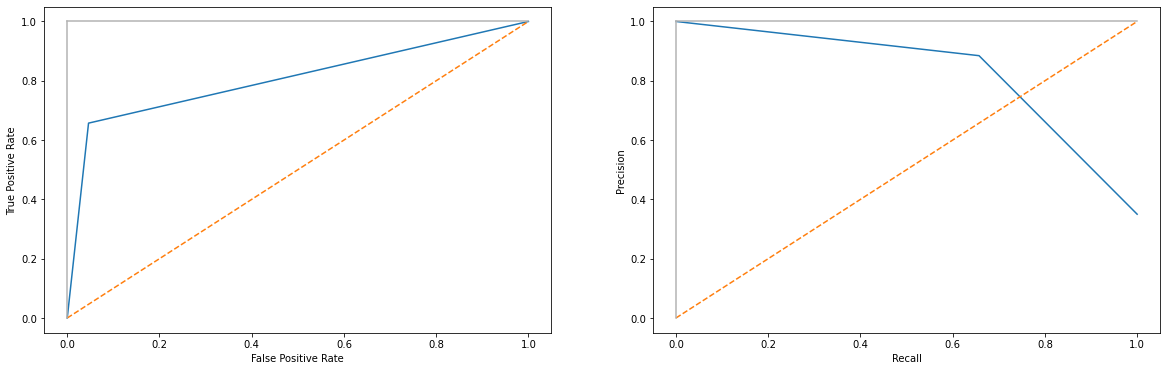

In [65]:
# plotting Receiver operating characteristic (ROC) graph.

fpr_log,tpr_log,thres_log = roc_curve(ytest, ypred)
log_precision, log_recall, log_thres = precision_recall_curve(ytest, ypred)


fig, ax = plt.subplots(1,2,figsize=(20,6))

ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print("Area under the ROC curve - ",roc_auc_score(ytest, ypred),"\n\n")


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
plt.show()

we get area under ROC curve more thane 80% which is good for our model.

### Finding Best Threshold value for Model

check for default Threshold value.

In [66]:
np.where(logreg.predict_proba(Xtest)[:,1] > .50,1,0)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [67]:
logreg.predict(Xtest)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

Default threshold value is at 0.5

In [68]:
# now check prediction with setting threshold value as 0.25

pred25 = np.where(logreg.predict_proba(Xtest)[:,1]>0.25,1,0)

In [69]:
# accurecy score of pred25

accuracy_score(ytest,pred25)

0.79

accuracy score is fall down to 79% ,so threshold value as 0.25 is not good for our model.

In [70]:
# now check prediction with setting threshold value as 0.75

pred75 = np.where(logreg.predict_proba(Xtest)[:,1]>0.75,1,0)

In [71]:
# accurecy score of pred75

accuracy_score(ytest,pred75)

0.77

accuracy score is fall down to 77% , so threshold value as 0.25 is not good for our model.

In [72]:
# makking datset for diffrent threshold values.

In [73]:
predicted_proba = logreg.predict_proba(Xtest)[:,1]

In [74]:
cutoff_df = pd.DataFrame({"Actual":ytest,"Predicted_prob":predicted_proba})
cutoff_df

,Actual,Predicted_prob
248,0,0.281956
318,1,0.327002
173,0,0.064607
285,1,0.378420
184,0,0.086780
...,...,...
380,0,0.412388
311,1,0.503392
110,0,0.318200
90,0,0.018089


In [75]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    cutoff_df[i]= cutoff_df.Predicted_prob.map(lambda x: 1 if x > i else 0)
cutoff_df

,Actual,Predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
248,0,0.281956,1,1,1,0,0,0,0,0,0,0
318,1,0.327002,1,1,1,1,0,0,0,0,0,0
173,0,0.064607,1,0,0,0,0,0,0,0,0,0
285,1,0.378420,1,1,1,1,0,0,0,0,0,0
184,0,0.086780,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,0.412388,1,1,1,1,1,0,0,0,0,0
311,1,0.503392,1,1,1,1,1,1,0,0,0,0
110,0,0.318200,1,1,1,1,0,0,0,0,0,0
90,0,0.018089,1,0,0,0,0,0,0,0,0,0


In [76]:
# calculating Sensitivity, Specificity and accuracy with different probability cutoffs.

from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm1 = confusion_matrix(cutoff_df.Actual, cutoff_df[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

In [77]:
cutoff_df1

,prob,accuracy,sensi,speci
0.0,0.0,0.35,1.000000,0.000000
0.1,0.1,0.68,1.000000,0.507692
0.2,0.2,0.75,0.971429,0.630769
0.3,0.3,0.84,0.914286,0.800000
0.4,0.4,0.84,0.742857,0.892308
0.5,0.5,0.85,0.657143,0.953846
0.6,0.6,0.83,0.571429,0.969231
0.7,0.7,0.81,0.514286,0.969231
0.8,0.8,0.77,0.400000,0.969231
0.9,0.9,0.74,0.285714,0.984615


<IPython.core.display.Javascript object>


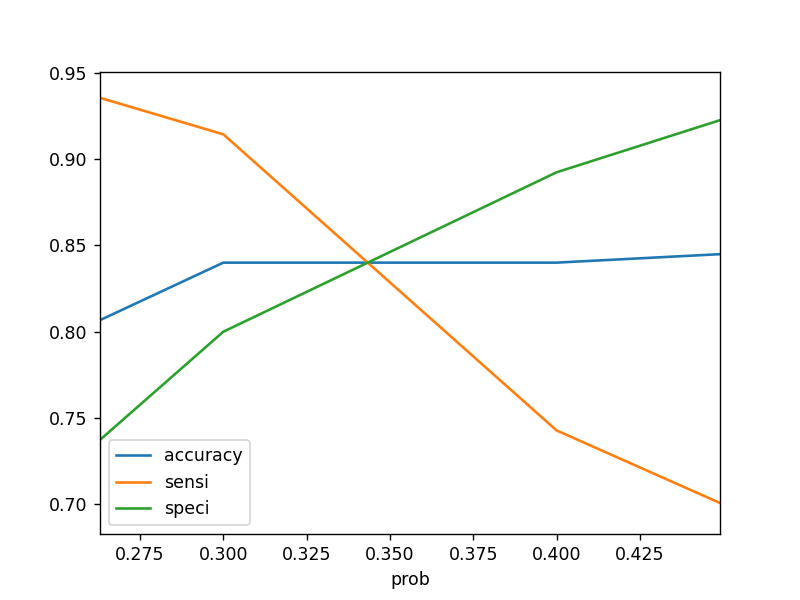

In [78]:
%matplotlib notebook
cutoff_df1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<IPython.core.display.Javascript object>


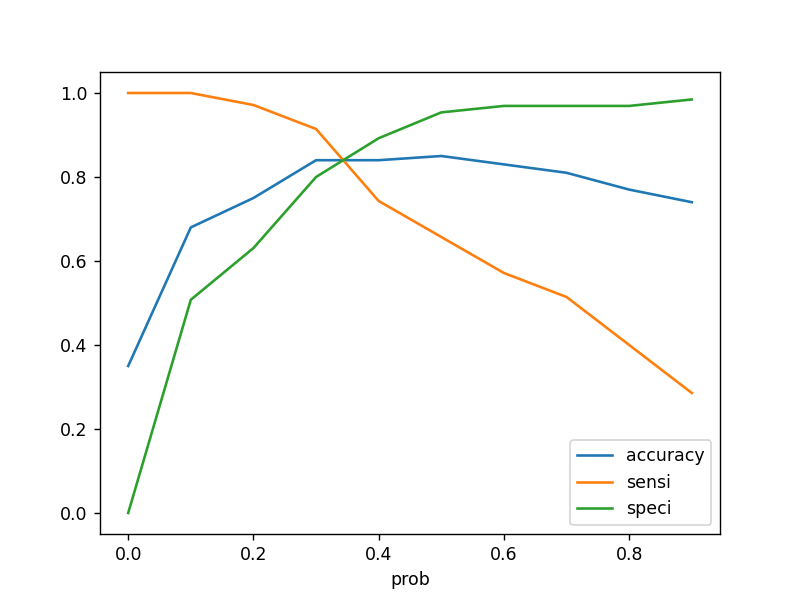

In [79]:
cutoff_df1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

in above graph curv accuracy , snesitivity, and scecificity intersect at 0.343. now we have to check accuracy at threshold value setting as 0.343.

In [80]:
preds3 = np.where(logreg.predict_proba(Xtest)[:,1] > 0.343, 1, 0)
preds3

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [81]:
accuracy_score(ytest,preds3)

0.87

#### we get 87 % score with threshold value setted as 0.343

for confirmation of best threshold value as 0.343 , we have to check approximate accuracy score with threshold values lies between .33 to 0.35.

In [82]:
# threshold value as 0.33.
pred33 = np.where(logreg.predict_proba(Xtest)[:,1] > 0.33, 1, 0)
pred33

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [83]:
accuracy_score(ytest,pred33)

0.86

0.33 is not accurate threshold value.


In [84]:
# threshold value as 0.35.
pred35 = np.where(logreg.predict_proba(Xtest)[:,1] > 0.35, 1, 0)
pred35

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [85]:
accuracy_score(ytest,pred35)

0.85

0.35 is not accurate threshold value.

### We Get Best Accurasy Score as 87% at Threshold Value is at .0343 